In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt

In [2]:
X1 = np.random.multivariate_normal([1, 2], cov=[[3, 1], [1, 2]], size=(100))
X2 = np.random.multivariate_normal([9, 7], cov=[[2, 1], [1, 2]], size=(100))

X = np.concatenate([X1, X2], axis=0)
y = np.concatenate([np.ones((100, 1)), np.zeros((100, 1))])
ix = np.arange(0,200)
np.random.shuffle(ix)
X = X[ix]
y = y[ix].reshape(-1)


In [3]:
X.shape, y.shape

((200, 2), (200,))

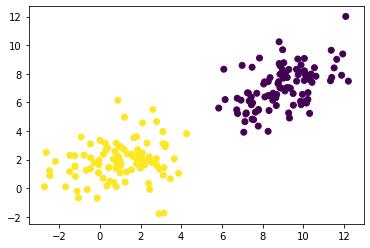

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [5]:
X.shape, y.shape

((200, 2), (200,))

In [7]:
# import time
class LogisticRegressionCustom:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
    
    def sigmoid(self, Z):
        return 1/(1 + (np.e)**-Z)
    
    def predict(self, X):
        return self.sigmoid(X.dot(self.W))

    def get_gradient(self, X, y):
        gradient = []

        for i in range(X.shape[1]): # n+1
            gradient.append(((y - self.predict(X)) * -X[:, i].reshape(-1,1)).sum()) # safe approach is always provide axis
        
        return np.array(gradient).reshape(-1,1)

    def accuracy(self, X, y, threshold=0.5):
        return ((self.predict(X) >= threshold).astype("int") == y).mean()

    def loss(self, y_true, y_pred):
        ix_zeros = np.arange(0, y_true.shape[0])[y_true.reshape(-1) == 0]
        ix_ones = np.arange(0, y_true.shape[0])[y_true.reshape(-1) == 1]
        
        y_zero = np.log(1 - y_pred[ix_zeros] + 1e-10).sum()
        y_one = np.log(y_pred[ix_ones] + 1e-10).sum()

        return -1 * (y_zero + y_one)
        # return -1 * (y_true * np.log(y_pred) + (1-y_true) * np.log(1 - y_pred)).sum() 
    
    def batch_gradient_descent(self, X, y, n_epochs=500):
        X = np.copy(X)
        X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1) #constant column added
        y = y.reshape(-1,1)
        self.W = np.random.randn(X.shape[1], 1)
        losses = []
        for i in range(n_epochs):
            self.W = self.W - self.learning_rate*self.get_gradient(X, y)
            loss = self.loss(y, self.predict(X))
            print("\r"+f"epoch: {i+1}, loss: {loss}, acc: {self.accuracy(X, y)}", end="")
            # time.sleep(0.1)
            losses.append(loss)
        
        return np.array(losses)


    def fit(self, X, y, method="batch", **kwargs):

        if method == "batch":
            losses = self.batch_gradient_descent(X, y, **kwargs)

        return losses

epoch: 1500, loss: 3.550631813210656, acc: 1.0

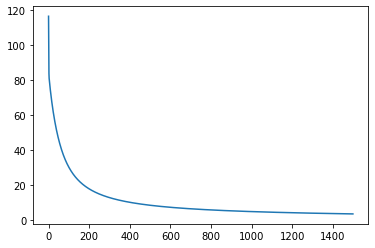

In [8]:
lr = LogisticRegressionCustom(learning_rate=0.001)
losses = lr.fit(X, y, n_epochs=1500)
plt.plot(losses)
plt.show()

In [9]:
b, m1, m2 = lr.W.reshape(-1)

In [10]:
b, m1, m2

(6.9677719534763565, -1.2826844924589658, -0.23001225784870136)

In [11]:
x1 = np.linspace(-4, 13, num=100)
x2 = -1*(m1*x1 + b)/m2


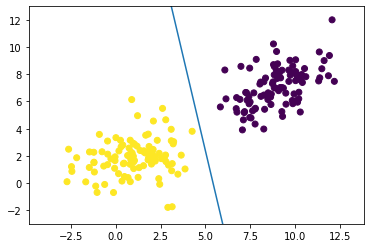

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot(x1, x2)
plt.ylim(-3, 13)
plt.show()

In [17]:
def plot_predict(X):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
    x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
    X1, X2 = np.meshgrid(x1, x2)
    Z = lr.sigmoid(X1.reshape(-1,1)*m1 + X2.reshape(-1,1)*m2 + b)
    Z = Z.reshape(-1,1)
    # ax.contour3D(M, B, L)
    # ax.plot_surface(X1.reshape(-1,1), X2.reshape(-1,1), Z)
    ax.scatter(X1.reshape(-1,1), X2.reshape(-1,1), Z)

    ax.set_xlabel('x1 axis')
    ax.set_ylabel('x2 axis')
    ax.set_zlabel('z axis')

    plt.show()

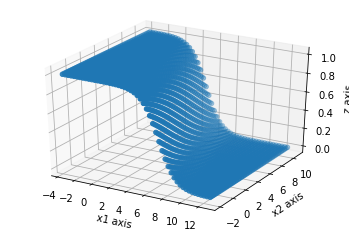

In [18]:
plot_predict(X)

## SKLEARN

In [13]:
from sklearn.linear_model import LogisticRegression

In [37]:
sk_lr = LogisticRegression(penalty="l2")
sk_lr.fit(X, y)



LogisticRegression()

In [38]:
sk_lr.score(X, y)

1.0

In [40]:
sk_lr.coef_, sk_lr.intercept_

(array([[-1.59344158, -0.79678537]]), array([11.4837702]))

In [41]:
sk_lr.predict(X[:10])

array([1., 1., 1., 0., 0., 0., 0., 1., 1., 0.])

In [29]:
sk_lr.predict_proba(X[:10])

array([[8.81114777e-08, 9.99999912e-01],
       [4.61830574e-12, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 7.38622195e-17],
       [1.00000000e+00, 1.33392534e-23],
       [1.00000000e+00, 2.89908667e-28],
       [1.00000000e+00, 1.55595861e-24],
       [0.00000000e+00, 1.00000000e+00],
       [6.66133815e-16, 1.00000000e+00],
       [1.00000000e+00, 6.25563248e-23]])